# My Capstone Project for Data Science and Machine Learning

## 1. Initial Problem and Overview

Let's imagine the city council wants to create an advertising campaign to rise awareness among the car drivers in the city and to reduce car accident fatality. For this porpuse, we use the given sample database. The goal is to study which are the conditions that rise the accident probability and which are the factors that provoke fatality. After this work, we should be able to predict the conditions that lead to accidents. 

In this way, the city council should be able to make an advertisement campaign in order to make the drivers aware of the danger in the most critical moments. 

## 2. Our available data

The available data is in the CSV file provided. It has dimensions of 194673 rows x 39 columns. The first step is to remove the useless information of the table in order to be able to handle the data with ease. We can remove the useless columns, but in this case it's easier to just select the useful ones and create a new dataframe with them. 

The chosen columns are: 'SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER' and 'UNDERINFL'. Let's keep it simple; this amount of information is enough for solving our problem. 
For example, the factors of the accident can be the weather conditions ('WEATHER'), the light conditions ('LIGHTCOND'), or the road condition ('ROADCOND'). The target variable is the severity of the accident ('SEVERITYCODE')

Now it's time to get started.



## 3. Cleaning data

For this step, we'll just try to remove the rows that have missing values and see if we do not miss much information by doing that. 
Then, we can just normalise and transform the data in order to be able to work with all columns in a mathematical way. 
We just finished the first step of the project. Now our data is preprocessed. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
idf=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',\
                low_memory=False)

In [3]:
df_tr=idf
df_tr['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_tr['COLLISIONTYPE'].replace(to_replace=['Other'], value=['CT_Other'],inplace=True)
df_tr['WEATHER'].replace(to_replace=['Other'], value=['W_Other'],inplace=True)
df_tr['WEATHER'].replace(to_replace=['Unknown'], value=['W_Unknown'],inplace=True)
df_tr['ROADCOND'].replace(to_replace=['Unknown'], value=['RC_Unknown'],inplace=True)
df_tr['LIGHTCOND'].replace(to_replace=['Other'], value=['LC_Other'],inplace=True)
df_tr['LIGHTCOND'].replace(to_replace=['Unknown'], value=['LC_Unknown'],inplace=True)

#We get the dummies of the selected columns to improve our data

df_test = df_tr[['SEVERITYCODE','COLLISIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
df_test = pd.concat([df_test,pd.get_dummies(df_tr['COLLISIONTYPE'])], axis=1)
df_test.drop(['COLLISIONTYPE'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['WEATHER'])], axis=1)
df_test.drop(['WEATHER'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['ROADCOND'])], axis=1)
df_test.drop(['ROADCOND'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['LIGHTCOND'])], axis=1)
df_test.drop(['LIGHTCOND'], axis = 1,inplace=True)
df_test= df_test.dropna()
df_test.head()
#This is de DF we are working with

,SEVERITYCODE,UNDERINFL,Angles,CT_Other,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,LC_Other,LC_Unknown
0,2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### We just selected the columns that are useful for our porpuse. Now, our task is to convert the data into intiger values to be able to evaluate it properly. 

#### Notice that below we transformed, for instance, the ROADCOND column into different values from 0 to 3, depending on the danger of the condition of the road. This is kind of subjetive, but I feel this is the critical qualitative conclussion that we must reach.

### After that, we transform the category of the data into intigers. 

## Now our data is clean and has 'int' type. Now we store the TARGET VARIABLE y, and the rest of the Df into X in array format.

In [4]:
X = df_test.drop(labels='SEVERITYCODE', axis=1)
X.head()

,UNDERINFL,Angles,CT_Other,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,LC_Other,LC_Unknown
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
y = df_test['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142341, 40) (142341,)
Test set: (47448, 40) (47448,)


### And now we have our train set and our test set. Now we are ready to start aplying algorithms. 

# Let's try first with the KNN algorithm

In [7]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
#to find best K
Ks=10

mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.63292446, 0.71063059, 0.70015596, 0.72742792, 0.69783763,
       0.7290086 , 0.72700641, 0.73598466, 0.73303406])

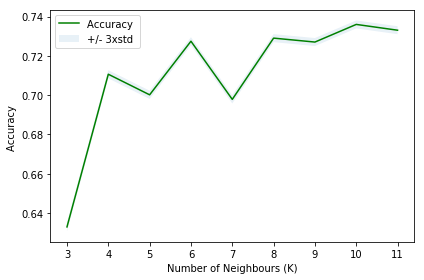

Best Accuracy: 0.73598465688754 , K = 8


In [10]:
#Graphical proof
k=Ks
plt.plot(range(3,k+2),mean_acc,'g')
plt.fill_between(range(3,k+2),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "Best Accuracy:", mean_acc.max(), ", K =", mean_acc.argmax()+1)

### So we proved that 8 is the best amount of neighbours

In [11]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [12]:
k=8
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

knn_y_pred=knn.predict(X_test)

jaccard_knn=jaccard_similarity_score(y_test,knn_y_pred)
F1_knn=f1_score(y_test,knn_y_pred,average='weighted')


In [13]:
print ("Jaccard of Knn is: %.2f" % jaccard_knn)
print ("F1 of Knn is: %.2f" % F1_knn)

Jaccard of Knn is: 0.74
F1 of Knn is: 0.69


## Decission Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion="entropy", max_depth=7)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
dt_y_pred=dt.predict(X_test)

In [16]:
jaccard_dt=jaccard_similarity_score(y_test,dt_y_pred)
jaccard_dt=f1_score(y_test,dt_y_pred,average='weighted')
print ("Jaccard of DT is: %.2f" % jaccard_dt)
print ("F1 of DT is:%.2f" % jaccard_dt)

Jaccard of DT is: 0.68
F1 of DT is:0.68


## Logistic Regression

In [17]:
LR=LogisticRegression(C=0.01,solver='sag').fit(X_train,y_train)
LR_y_pred=LR.predict(X_test)
LR_y_prob=LR.predict_proba(X_test)
log_loss(y_test,LR_y_prob)

0.4913778459766904

In [18]:
jaccard_LR=jaccard_similarity_score(y_test,LR_y_pred)
f1_LR=f1_score(y_test,LR_y_pred,average='weighted')
print ("Jaccard of LR is: %.2f" % jaccard_LR)
print ("F1 of LR is: %.2f" % f1_LR)

Jaccard of LR is: 0.75
F1 of LR is: 0.69


### Therefore, we conclude that our best model for predicting fatality in an accident is the logistic regression.

Now let's plot the confussion matrix of LogRegresssion

In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, LR_y_pred, labels=[2,1]))

[[ 3724 10703]
 [ 1824 31197]]


Confusion matrix, without normalization
[[ 3724 10703]
 [ 1824 31197]]


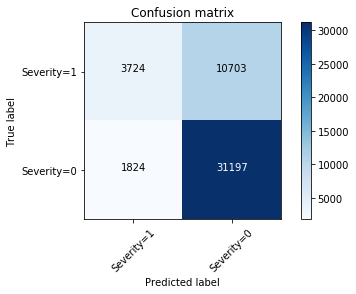

In [23]:
cnf_matrix = confusion_matrix(y_test, LR_y_pred, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix')

# Conclusions

## Our model predicts almost 100% correctly when severity=0, but it fails terribly when predicting severity=1. This doesn't mean that our work has been useless. 

## We have reached a useful conclusion: we need either to improve our models or to use our data in another way. For instance, we could try to add more columns to our study that may be useful and critical to the results. They may have appeared to be useless before. 